In [1]:
import numpy as np
import pandas as pd
from systole.detection import oxi_peaks
from systole.utils import heart_rate
from systole.hrv_time import nnX, pnnX, rmssd, time_domain
from systole.hrv_frequency import hrv_frequency
from scipy.signal import find_peaks

In [2]:
# Load data
df = pd.read_csv('rr.txt')

# Time domain

In [3]:
nnX(df.rr)

64

In [4]:
pnnX(df.rr)

26.229508196721312

### Root mean square of the successisve differences

In [5]:
rmssd(df.rr)

45.5466693541162

In [6]:
time_domain(df.rr)

,Value,Metric
0,883.00,MeanRR
1,68.58,MeanBPM
2,886.67,MedianRR
3,67.67,MedianBPM
4,676.00,MinRR
5,53.70,MinBPM
6,1117.33,MaxRR
7,88.76,MaxBPM
8,84.69,SDNN
9,45.55,RMSSD


# Frequency domain

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 256000 is greater than input length  = 215402, using nperseg = 215402
  .format(nperseg, input_length))


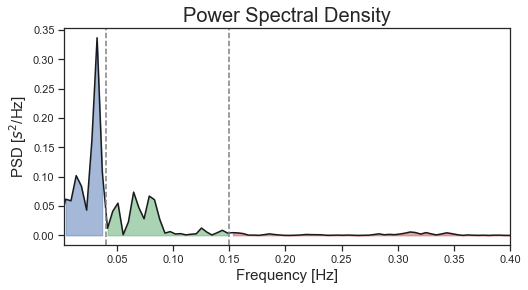

In [7]:
hrv_frequency(df.rr.values)

In [101]:
time[1]

2008.0

In [102]:
from scipy.signal import welch
import numpy as np
from scipy import interpolate

sfreq=5
x = df.rr.values
time = np.cumsum(x)
f = interpolate.interp1d(time, x, kind='cubic')
new_time = np.arange(time[0], time[-1], 200)
x = f(new_time)
# Define window length
nperseg = 256 * sfreq

# Compute Power Spectral Density
freq, psd = welch(x=x, fs=sfreq, nperseg=nperseg, nfft=nperseg)

psd = psd/1000000

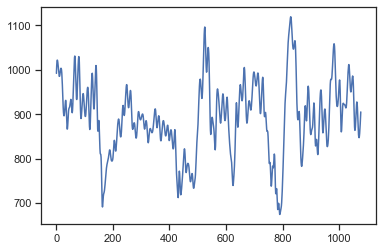

In [103]:
plt.plot(x)

In [104]:
fbands = {'vlf': ['Very low frequency', (0.003, 0.04), 'b'],
                  'lf':	['Low frequency', (0.04, 0.15), 'g'],
                  'hf':	['High frequency', (0.15, 0.4), 'r']}

In [121]:
freq_res = freq[1] - freq[0]

stats = pd.DataFrame([])
for band in fbands:
    this_psd = psd[(freq >= fbands[band][1][0]) & (freq < fbands[band][1][1])]
    this_freq = freq[(freq >= fbands[band][1][0]) & (freq < fbands[band][1][1])]
    
    # Peaks (Hz)
    peak = round(this_freq[np.argmax(this_psd)], 4)
    stats = stats.append({'Values': peak, 'Metric': band+'_peak'}, ignore_index=True)

    # Power (ms**2)
    power = np.trapz(x=this_freq, y=this_psd) * 1000000
    stats = stats.append({'Values': power, 'Metric': band+'_power'}, ignore_index=True)

hf = stats.Values[stats.Metric == 'hf_power'].values[0]
lf = stats.Values[stats.Metric == 'lf_power'].values[0]
vlf = stats.Values[stats.Metric == 'vlf_power'].values[0]

# Power (%)
power_per_vlf = vlf/(vlf+lf+hf)*100
power_per_lf = lf/(vlf+lf+hf)*100
power_per_hf = hf/(vlf+lf+hf)*100

# Power (n.u.)
power_nu_hf = hf/(hf + lf)
power_nu_lf = lf/(hf + lf)

values = [power_per_vlf, power_per_lf, power_per_hf, power_nu_hf, power_nu_lf]
metrics = ['pover_vlf_per', 'pover_lf_per', 'pover_hf_per', 'pover_lf_nu', 'pover_hf_nu']

stats = stats.append(pd.DataFrame({'Values': values, 'Metric': metrics}), ignore_index=True, sort=False)

stats

,Metric,Values
0,vlf_peak,0.031200
1,vlf_power,4323.905884
2,lf_peak,0.066400
3,lf_power,2332.268389
4,hf_peak,0.312500
5,hf_power,555.182609
6,pover_vlf_per,59.959671
7,pover_lf_per,32.341603
8,pover_hf_per,7.698726
9,pover_lf_nu,0.192274


In [124]:
diff_rri = np.diff(df.rr.values)
sd1 = np.sqrt(np.std(diff_rri, ddof=1) ** 2 * 0.5)
sd2 = np.sqrt(2 * np.std(df.rr.values, ddof=1) ** 2 - 0.5 * np.std(diff_rri,
                                                          ddof=1) ** 2)
sd1, sd2

(32.27157760733894, 115.34089300554412)

(0, 0.4)

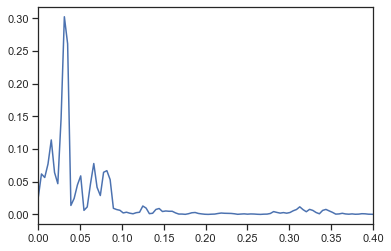

In [99]:
import matplotlib.pyplot as plt
plt.plot(freq, psd)
plt.xlim(0, 0.4)

## Pointcarre plot

Text(0, 0.5, '$RR_i+1 (ms)$')

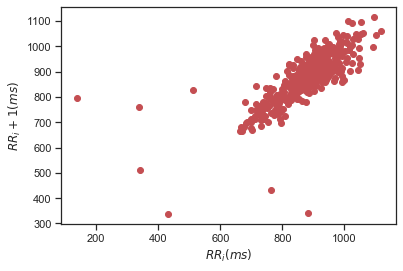

In [37]:
import matplotlib.pyplot as plt
plt.plot(rr[:-1], rr[1:], 'ro')
plt.xlabel(r'$RR_i (ms)$')
plt.ylabel(r'$RR_i+1 (ms)$')

In [40]:
df.rr.values.shape

(245,)

In [38]:
from hrv.classical import frequency_domain

results = frequency_domain(
    rri=df.rr.values,
    sf=4.0,
    method='welch',
    interp_method='cubic',
    detrend='linear'
)

TypeError: 'NoneType' object is not subscriptable

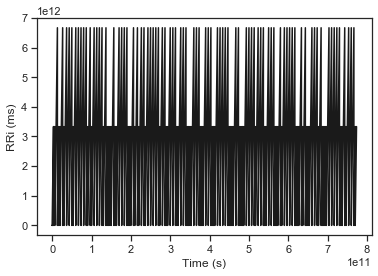

In [44]:
from hrv.io import read_from_text

rri = read_from_text('rr.txt')
fig, ax = rri.plot(color='k')

In [45]:
rri

RRi array([9.92000000e+02, 1.01600000e+03, 9.85000000e+02, 3.33333333e+12,
       1.00100000e+03, 3.33333333e+12, 9.82000000e+02, 6.66666667e+12,
       9.09000000e+02, 3.33333333e+12, 9.05000000e+02, 3.33333333e+12,
       9.28000000e+02, 8.66000000e+02, 6.66666667e+12, 9.04000000e+02,
       1.00000000e+01, 9.17000000e+02, 3.33333333e+12, 1.10000000e+01,
       9.32000000e+02, 1.20000000e+01, 9.04000000e+02, 1.30000000e+01,
       9.86000000e+02, 6.66666667e+12, 1.40000000e+01, 1.02200000e+03,
       6.66666667e+12, 1.50000000e+01, 9.34000000e+02, 6.66666667e+12,
       1.60000000e+01, 9.92000000e+02, 1.70000000e+01, 1.01700000e+03,
       3.33333333e+12, 1.80000000e+01, 9.02000000e+02, 6.66666667e+12,
       1.90000000e+01, 9.12000000e+02, 2.00000000e+01, 9.46000000e+02,
       6.66666667e+12, 2.10000000e+01, 9.10000000e+02, 6.66666667e+12,
       2.20000000e+01, 8.98000000e+02, 6.66666667e+12, 2.30000000e+01,
       9.50000000e+02, 6.66666667e+12, 2.40000000e+01, 9.41000000e+02,
  